In [ ]:
from PIL import Image
import os

def convertir_png_a_jpg_en_carpeta(carpeta_origen, carpeta_destino, calidad=95):
    # Verificar si la carpeta de destino existe, si no, crearla
    if not os.path.exists(carpeta_destino):
        os.makedirs(carpeta_destino)

    # Recorrer todas las imágenes en la carpeta de origen
    for archivo_png in os.listdir(carpeta_origen):
        if archivo_png.endswith(".png"):
            # Construir la ruta completa de la imagen de origen
            ruta_origen = os.path.join(carpeta_origen, archivo_png)

            # Abrir la imagen PNG
            imagen = Image.open(ruta_origen)

            # Crear la ruta de destino con el mismo nombre de archivo pero extensión JPG
            nombre_archivo, _ = os.path.splitext(archivo_png)
            ruta_destino = os.path.join(carpeta_destino, f"{nombre_archivo}.jpg")

            # Convertir y guardar como JPEG
            imagen.convert("RGB").save(ruta_destino, "JPEG", quality=calidad)

            print(f"Imagen convertida y guardada en: {ruta_destino}")

# Ejemplo de uso
carpeta_origen = "E:/Datsets/Flores/tulip"
carpeta_destino = "E:/Datsets/Flores/rotar/"
convertir_png_a_jpg_en_carpeta(carpeta_origen, carpeta_destino)


In [ ]:
from matplotlib import pyplot as plt
from skimage.transform import resize
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np


modelpath = './Flores.h5py'
model = tf.keras.models.load_model(modelpath)

target_size = (28, 28)
img = image.load_img('./Girasol.jpg')
img = img.resize((28, 28))

img_array = image.img_to_array(img)
img = np.expand_dims(img_array, axis=0)

predictions = model.predict(img_array)
class_names = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulip']

predictted_class = np.argmax(predictions, axis=1)
predicted_labels = [class_names[id] for id in predictted_class] 

print(predicted_labels)
plt.imshow(img)
plt.title(predicted_labels)
plt.show()

1/1 [==============================] - 0s 74ms/step


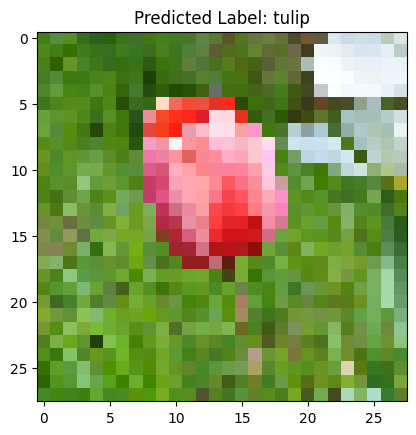

In [27]:
from matplotlib import pyplot as plt
from skimage.transform import resize
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

modelpath = './Flores.h5py'
model = tf.keras.models.load_model(modelpath)

target_size = (28, 28)
img_path = './Tulipan.jpg'

# Load and resize the image
img = image.load_img(img_path, target_size=target_size)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Normalize pixel values to be between 0 and 1
img_array /= 255.0

# Make predictions
predictions = model.predict(img_array)
class_names = ['astilbe', 'iris', 'roses', 'sunflowers', 'tulip']

predicted_class = np.argmax(predictions, axis=1)
predicted_label = class_names[predicted_class[0]]

# Display the image and predicted label
plt.imshow(img)
plt.title(f'Predicted Label: {predicted_label}')
plt.show()
